## Anki Card Analysis

In [1]:
import os
import pandas as pd
import sqlite3

COLLECTION_PATH = "/Users/jacob/Library/Application Support/Anki2/Minerva/collection.anki2"
cnx = sqlite3.connect(COLLECTION_PATH)

revlog = pd.read_sql_query("SELECT * FROM revlog", cnx)
col = pd.read_sql_query("SELECT * FROM col", cnx)
cards = pd.read_sql_query("SELECT * FROM cards", cnx)
notes = pd.read_sql_query("SELECT * FROM notes", cnx)

# Col

In [2]:
# print(col.columns)
from datetime import datetime
import json

print(f'This account was created on {pd.to_datetime(col.crt[0], unit = "s")}')
print(f'This account was last synced on {pd.to_datetime(col.ls, unit = "ms")[0]}')
print(f"This account was last modified on {pd.to_datetime(col['mod'],unit = 'ms')[0]}")
print(f"The schema was last modified on {pd.to_datetime(col['scm'],unit = 'ms')[0]}")
print(f"This version is {col['ver'][0]}.")
      
decks = json.loads(col.decks[0])
tags = json.loads(col.tags[0])


This account was created on 2017-09-24 19:00:00
This account was last synced on 2019-02-26 07:27:44.454000
This account was last modified on 2019-03-10 17:03:14.187000
The schema was last modified on 2019-01-16 14:02:34.305000
This version is 11.


# Notes vs Cards
Notes are objects from which cards are created. So there could be potentially 2 cards per note, if there is a forward card and a reverse card.

There are 2263 total notes.
There are 3656 total cards.


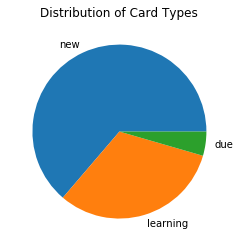

In [4]:
import matplotlib.pyplot as plt
print(f'There are {len(notes.index)} total notes.')
print(f'There are {len(cards.index)} total cards.')

plt.pie(cards.type.value_counts(), labels = ['new', 'learning', 'due'])
plt.title('Distribution of Card Types')
plt.show()

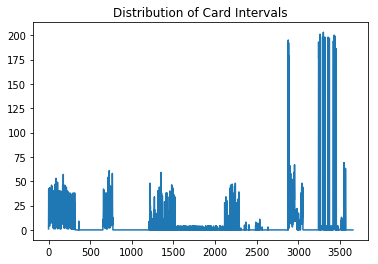

In [5]:
plt.plot(cards.ivl)
plt.title('Distribution of Card Intervals')
plt.show()

In [6]:
from datetime import timedelta, datetime


datetime.today() + timedelta(days = 5)

datetime.datetime(2019, 3, 15, 16, 3, 20, 727336)

/Users/jacob/miniconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


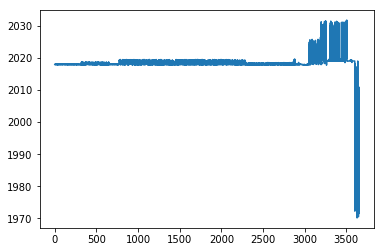

In [8]:
from datetime import timedelta, datetime
crt = pd.to_datetime(col.crt[0], unit = "s")
intervals = []
for i in cards.due:
    if i > 1000000:
        intervals.append(pd.to_datetime(i, unit = "s"))
    else:
        intervals.append(crt + timedelta(days = i))
# convert cards into two types: due in integers, and due in intervals. 

plt.plot(intervals)

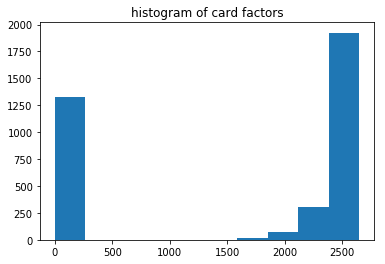

In [12]:
plt.hist(cards.factor)
plt.title('histogram of card factors')
plt.show()

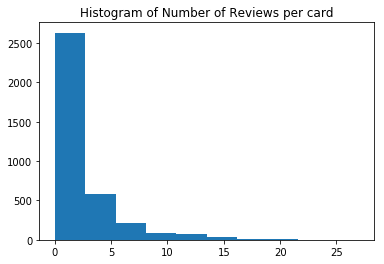

In [10]:
plt.hist(cards.reps)
plt.title('Histogram of Number of Reviews per card')
plt.show()

In [ ]:
import sys
import os
import pandas as pd
import sqlite3
    

#   paths
ANKI_PATH = '/Users/jacob/anki'
COLLECTION_PATH = "/Users/jacob/Library/Application Support/Anki2/Minerva/collection.anki2"

os.chdir(ANKI_PATH)
from anki import Collection

col = Collection(COLLECTION_PATH)

# totalCards = col.db.scalar("""SELECT COUNT(id) from cards""")
# totalNotes = col.db.scalar("""SELECT COUNT(id) from notes""")

print(f'There are {col.db.scalar("SELECT COUNT(id) from cards")} total cards.')
print(f'There are {col.db.scalar("SELECT COUNT(id) from notes")} total notes.')

df = pd.DataFrame()

col.close()

In [ ]:
cnx = sqlite3.connect(COLLECTION_PATH)
df = pd.read_sql_query("SELECT * FROM revlog", cnx)

df.head()

In [ ]:
import matplotlib.pyplot as plt
print(f"There are a total of {len(df.index)} reviews.")
plt.plot(df.ivl)
plt.show()
plt.plot(df.factor)
plt.show()

In [ ]:
df

In [ ]:
df.sort_values(['cid', 'id'])